<a href="https://colab.research.google.com/github/Nithya153/devops/blob/main/week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Flow Chart
-----
1.Import packages
---
2.Loading dataset
----
3.Spliting test n train datset
----
4.Feature scaling
----
5.Perform Ridge Regression
----
6.Fit the model
----
7.Mean square error and R-Square and MAE
-----
8.Grid search Without sklearn
---
9.Random Search without sklearn
-----
10.Summary

# Import packages

In [1]:
import numpy as np
import pandas as pd

#Load Dataset

In [2]:
df = pd.read_csv("/content/company.csv")
df.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


#Splitting Train and Test dataset 

In [4]:
ratio = 0.7
 
rows = df.shape[0]
train_size = int(rows*ratio)

df_train = df[0:train_size]
df_test = df[train_size:]

In [5]:
X_train = df_train.drop(['Sales'], axis = 1).values ## independent features

In [6]:
y_train = df_train['Sales'].values  ## dependent features

In [7]:
X_test = df_test.drop(['Sales'], axis = 1).values

In [8]:
y_test = df_test['Sales'].values

#Feature scaling

In [9]:
X_train = (X_train - np.mean(X_train)) / np.std(X_train)
X_test = (X_test - np.mean(X_test)) / np.std(X_test)

#Perform Ridge Regression

This  defines a class called RidgeRegression, which is used to perform Ridge Regression, a type of linear regression with L2 regularization.
---
The class takes three arguments : learning_rate, iterations, and l2_penality.
---
The fit method of the class takes two arguments, X and Y, which are the input and output data for the regression problem. The method initializes the weights to zero and then performs gradient descent for the specified number of iterations.
-----




In [10]:
class RidgeRegression() :
      
    def __init__( self, learning_rate, iterations, l2_penality ) :
          
        self.learning_rate = learning_rate        
        self.iterations = iterations        
        self.l2_penality = l2_penality
          
    # Function for model training            
    def fit( self, X, Y ) :
          
        # no_of_training_examples, no_of_features        
        self.m, self.n = X.shape
          
        # weight initialization        
        self.W = np.zeros( self.n )
          
        self.b = 0        
        self.X = X        
        self.Y = Y
          
        # gradient descent learning
                  
        for i in range( self.iterations ) :            
            self.update_weights()            
        return self
      
    # Helper function to update weights in gradient descent
      
    def update_weights( self ) :           
        Y_pred = self.predict( self.X )
          
        # calculate gradients      
        dW = ( - ( 2 * ( self.X.T ).dot( self.Y - Y_pred ) ) +               
               ( 2 * self.l2_penality * self.W ) ) / self.m     
        db = - 2 * np.sum( self.Y - Y_pred ) / self.m 
          
        # update weights    
        self.W = self.W - self.learning_rate * dW    
        self.b = self.b - self.learning_rate * db        
        return self
      
    # Hypothetical function  h( x ) 
    def predict( self, X ) :    
        return X.dot( self.W ) + self.b
      
# Driver code
  
def main() :
      
    
    # Model training    
    model = RidgeRegression( iterations = 1000,                             
                            learning_rate = 0.01, l2_penality = 0.01 )
    model.fit( X_train, y_train )
      
    # Prediction on test set
    Y_pred = model.predict( X_test )    

      
   
      
if __name__ == "__main__" : 
    main()

#Gradient descent weight update formula
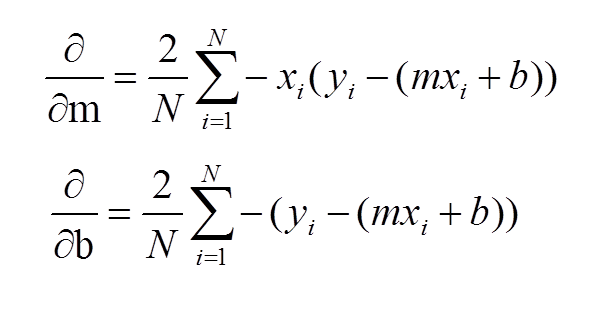

#Fit the model

In [11]:
model = RidgeRegression( iterations = 1000,                             
                            learning_rate = 0.01, l2_penality = 0.01)
model.fit( X_train, y_train )

In [12]:
Y_pred = model.predict( X_test ) 

#Mean square error and R-Square and Mean absolute error

In [13]:
mse = np.mean((Y_pred - y_test)**2)
r2 = 1 - np.sum((y_test - Y_pred)**2) / np.sum((y_test -np.mean(y_test))**2)
mae = np.sum(np.abs(y_test - Y_pred))/len(y_test)

print("MSE:", mse)
print("R-squared:", r2*100)
print("MAE:", mae)

MSE: 5.942321714386781
R-squared: 78.40717403191994
MAE: 1.9567567527475382


# Formula
---
1.R2
---
R^2 = 1 - \frac{RSS}{TSS}

R^2	=	coefficient of determination
----
RSS	=	sum of squares of residuals

TSS	=	total sum of squares


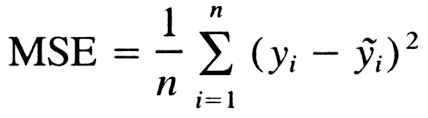

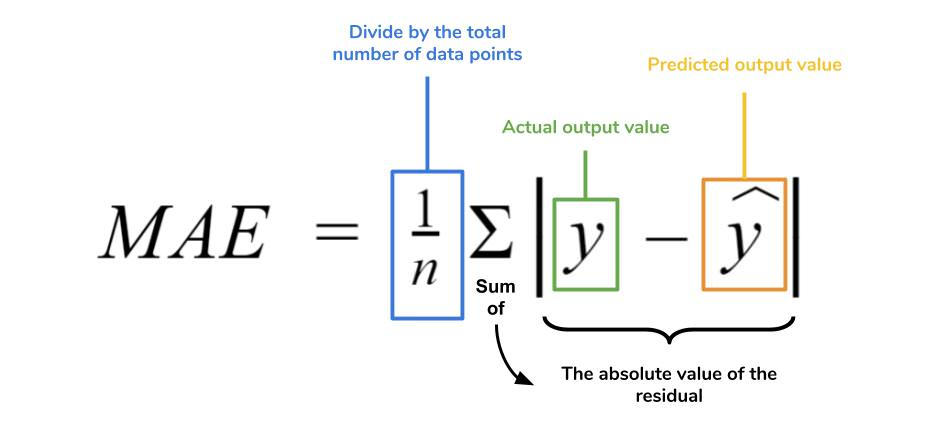

#Grid search without sklearn

In [14]:

  
def main() :  
      
      
    # learning_rate choices    
    learning_rates = [ 0.1, 0.2, 0.3, 0.4, 0.5, 
                      0.01, 0.02, 0.03, 0.04, 0.05]
      
    # iterations choices    
    iterations = [ 100, 200, 300, 400, 500 ]

    #l2 penalty
    l2_penality = [0.1,1,10,100,0.01,0.001]
    
      
    # available combination of learning_rate and iterations
      
    parameters = []    
    for i in learning_rates :        
        for j in iterations :
          for l in l2_penality :         
            parameters.append( ( i, j, l ) )
              
  
              
    # Applying linear searching in list of available combination
    # to achieved maximum accuracy on CV set
      
    for k in range( len( parameters ) ) :        
        model = RidgeRegression( learning_rate = parameters[k][0], 
                                iterations = parameters[k][1], l2_penality = parameters[k][2] )
      
        model.fit( X_train, y_train )
        
        # Prediction on validation set
        Y_pred = model.predict( X_test )
       

              
      
    mse = np.mean((Y_pred - y_test)**2)
    r2 = 1 - np.sum((y_test - Y_pred)**2) / np.sum((y_test -np.mean(y_test))**2)
    mae = np.sum(np.abs(y_test - Y_pred))/len(y_test)


              
    print("MSE:", mse)
    print("R-squared:", r2*100) 
    print("MAE:", mae)

if __name__ == "__main__" :     
    main()

MSE: 4.13914302951694
R-squared: 84.95944861467768
MAE: 1.6274147966317485


#Random search without sklearn

In [16]:

# Define Ridge Regression function
def ridge_regression(alpha, X_train, X_test, y_train, y_test):
    # Fit Ridge Regression model with given alpha
    model = np.linalg.inv(X_train.T.dot(X_train) + alpha*np.identity(X_train.shape[1])).dot(X_train.T).dot(y_train)
    
    # Predict on test set
    y_pred = X_test.dot(model)
     #would contain the predicted output values for each corresponding input sample in X_test, 
         #based on the learned patterns in the trained model.
    
    # Calculate R2 score
    r2 = 1 - np.sum((y_test - Y_pred)**2) / np.sum((y_test -np.mean(y_test))**2)
    
    return r2

# Define range of alpha values to search over
alphas = np.logspace(-3, 3, num=100)

# Define number of iterations for random search
n_iter = 10

# Initialize best hyperparameters and R2 score
best_alpha = None
best_r2 = -np.inf

# Perform random search
for i in range(n_iter):
    # Select random alpha value
    alpha = np.random.choice(alphas)
    
    # Compute R2 score for Ridge Regression with this alpha
    r2 = ridge_regression(alpha, X_train, X_test, y_train, y_test)
    
    # Update best hyperparameters and R2 score if necessary
    if r2 > best_r2:
        best_alpha = alpha
        best_r2 = r2
        
# Print best hyperparameters and R2 score
print("Best alpha: {:.5f}".format(best_alpha))
print("Best R2 score: {:.5f}".format(best_r2*100))


Best alpha: 0.15199
Best R2 score: 78.40717


 fits a Ridge regression model to the training set and computing the coefficients of the linear regression model that best fits the data while also minimizing the sum of squared errors and the Ridge penalty term.

In [22]:
model = RidgeRegression( iterations = 1000,                             
                            learning_rate = 0.01, l2_penality = 0.15199)
model.fit( X_train, y_train )

In [23]:
Y_pred = model.predict( X_test ) 

In [24]:
mae = np.sum(np.abs(y_test - Y_pred))/len(y_test)
mae

1.9555976424840593

In [25]:
mse = np.mean((Y_pred - y_test)**2)
mse

5.935633402011861

#Summary

In [26]:
df = [['Ridge',78.40717403191994,5.942321714386781,1.9567567527475382], ['gridsearch',84.95944861467768,4.13914302951694,1.6274147966317485],['randomsearch',78.40717,5.935633402011861,1.9555976424840593]]
summary = pd.DataFrame(df, columns=['Model', 'R2 Score', 'MSE','MAE'])
summary

,Model,R2 Score,MSE,MAE
0,Ridge,78.407174,5.942322,1.956757
1,gridsearch,84.959449,4.139143,1.627415
2,randomsearch,78.407170,5.935633,1.955598
